# Python 量化回测
- 回测是在历史市场数据上模拟和评估一个交易策略的过程。
- 在量化金融和算法交易中，回测是一个关键的步骤，用于评估交易策略在过去市场行为上的表现
- 通过回测，交易者可以了解其策略在不同市场条件下的表现，并进行优化和改进

回测通常包括以下步骤：
- **定义交易策略**：确定何时买入、卖出或持仓的规则。这可能涉及到技术指标、移动平均线策略、趋势跟踪、套利等各种策略。
- **获取历史数据**：获取过去的市场数据，包括股票、期货、外汇等金融工具的价格、成交量等信息。
- **模拟交易**：根据定义的策略，模拟在历史上数据执行交易。这包括确定何时买入或卖出，并计算每次交易的收益和损失。
- **计算绩效指标**：根据回测结果，计算各种绩效指标，如年化收益率，最大回撤，夏普比率等，以评估策略的表现。
- **优化策略**：如果回测结果不理想，交易者可以进行策略的优化，调整参数或修改规则，然后重新进行回测。
- **未来性检验**：回测的一个关键问题是防止未来数据的泄露。未来性检验是确保在设计和评估策略时只使用历史数据的一部分，以模拟实际交易中只能使用已知信息的情况。

简单的移动平均交叉策略的回测实例代码：

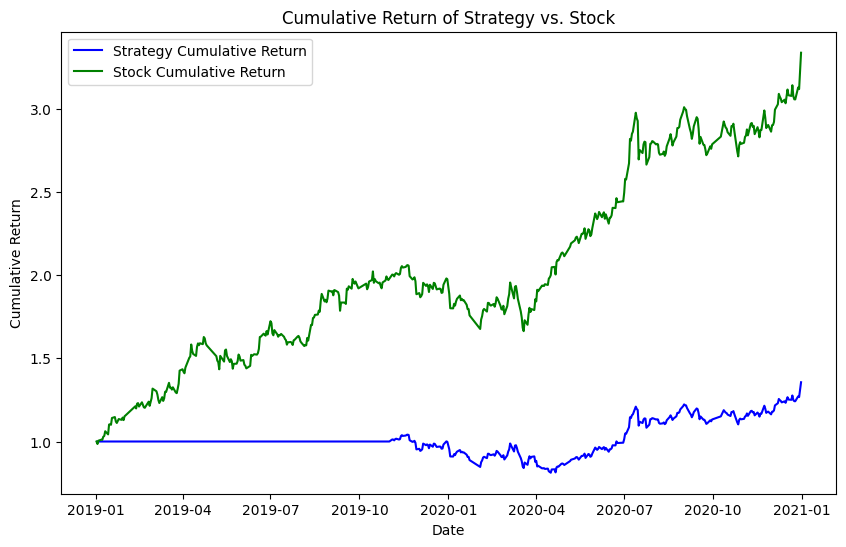

In [9]:
import yfinance as yf
import pandas as pf
import matplotlib.pyplot as plt

# 获取股票数据
symbol = '600519.SS' # 茅台股票代码
start_date = '2019-01-01'
end_date = '2021-01-01'

data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False, progress=False)

# 计算移动平均
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# 初始化交叉信号列
data['Signal'] = 0

# 计算交叉信号
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
data.loc[data['SMA_50'] < data['SMA_200'], 'Signal'] = -1

# 计算每日收益率
data['Daily_Return'] = data['Close'].pct_change()

# 计算策略信号的收益率（shift（1）是为了避免未来数据的偏差）
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']

# 计算累计收益
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

# 绘制累计收益曲线
plt.figure(figsize=(10,6))
plt.plot(data['Cumulative_Return'], label='Strategy Cumulative Return', color='b')
plt.plot(data['Close'] / data['Close'].iloc[0], label='Stock Cumulative Return', color='g')
plt.title('Cumulative Return of Strategy vs. Stock')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()